# cf-python exercises 4
----

## Assignment by condition
https://ncas-cms.github.io/cf-python/tutorial.html#assignment-by-condition

In [1]:
# import the cf package
import cf

In [2]:
# Read the field from file ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc
f = cf.read('ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc')[0]
f

<CF Field: air_temperature(time(120), latitude(145), longitude(192)) K>

In [3]:
# Find the units of the field
# (use the field's "units" attribute)
print(f.units)

K


https://ncas-cms.github.io/cf-python/method/cf.Field.where.html

https://ncas-cms.github.io/cf-python/constant.html

In [4]:
# Mask the field where it's values are less than 273.15 Kelvin
# (use the field's "where" method, with a condition defined by a
#  cf.lt query, and choose set missing values by specifying cf.masked for
#  the second argument)
g = f.where(cf.lt(273.15), cf.masked)

https://ncas-cms.github.io/cf-python/method/cf.Field.count.html

In [5]:
# Find the number of un-masked points in the original and masked fields
# (use the "count" method of the fields)
print(f.count())
print(g.count())

3340800
2179664


In [6]:
# Set up inline images and import cf-plot 
%matplotlib inline

import cfplot as cfp

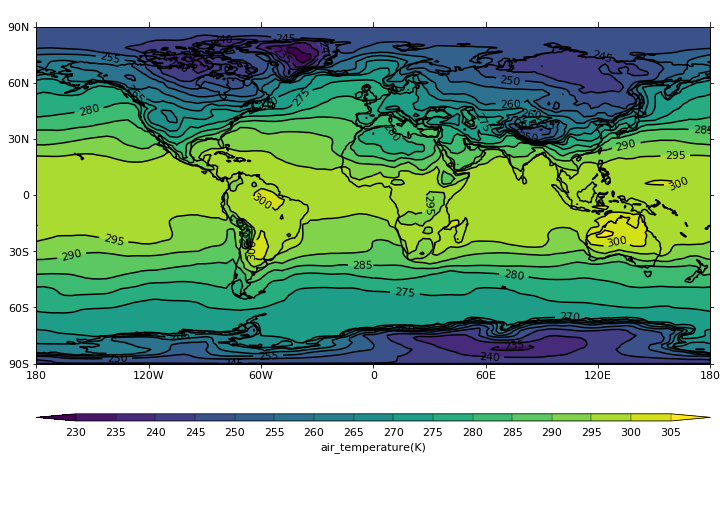

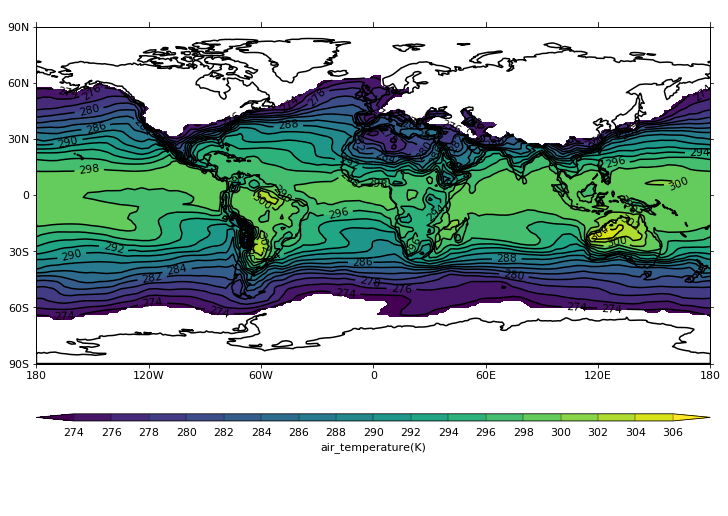

In [7]:
# Plot the first timeslice of the original and masked fields
# (use cfp.con)
cfp.con(f[0])
cfp.con(g[0])

https://ncas-cms.github.io/cf-python/method/cf.Field.copy.html

In [8]:
# Copy the original field and convert its units to degrees Celcius
# Use the field's "copy" method)
c = f.copy()
c.units = 'degC'

In [9]:
# Mask the original field where the "celcius" field is less than zero
# (define the condition of the "where" method as c<0, where c is the celcius field created above)
h = f.where(c<0, cf.masked)

In [10]:
# Check that the two methods of masking give the same result
# (use the field's "equals" method)
h.equals(g)

True

https://ncas-cms.github.io/cf-python/method/cf.Field.indices.html

In [11]:
# Mask the original field at all points outside of the tropics by finding the data indices to mask and 
# assigning them to missing data.
# (find the required indices with the field's "indices" method and the cf.wo function to find locations
#  without (i.e. outside of) a range. Then use indexed assignment to those indices)
indices = f.indices(latitude=cf.wo(-30, 30))
print(indices)
g = f.copy()
g[indices] = cf.masked

(slice(0, 120, 1), array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144]), slice(0, 192, 1))


https://ncas-cms.github.io/cf-python/function/cf.wo.html

In [12]:
# Create the same masked field using the "where" method
# (use the "construct" keyword to the field's "where" method to indicate that the condition
#  is to be applied to particular coordinates rather than the field's array values)
h = f.where(cf.wo(-30, 30), cf.masked, construct='latitude')

https://ncas-cms.github.io/cf-python/method/cf.Field.equals.html

In [13]:
# Check that the two methods give the same result
# (use the "equals" method)
h.equals(g)

True

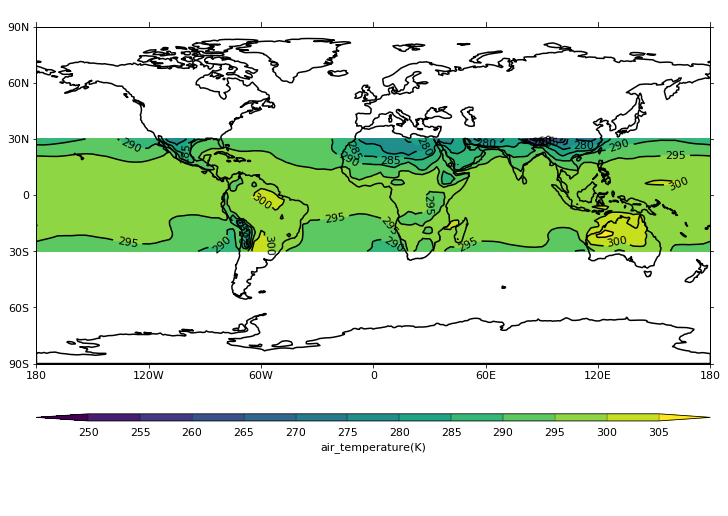

In [14]:
# Plot the field that is masked outside of the tropics
cfp.con(g[0])

In [15]:
# Mask the original data where it is less than its time average
# (use the python < comparison operator between two fields to create a condition
#  describing where the field is less than its mean)
t_mean = f.collapse('T: mean')
g = f.where(f<t_mean, cf.masked)
print(g)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m



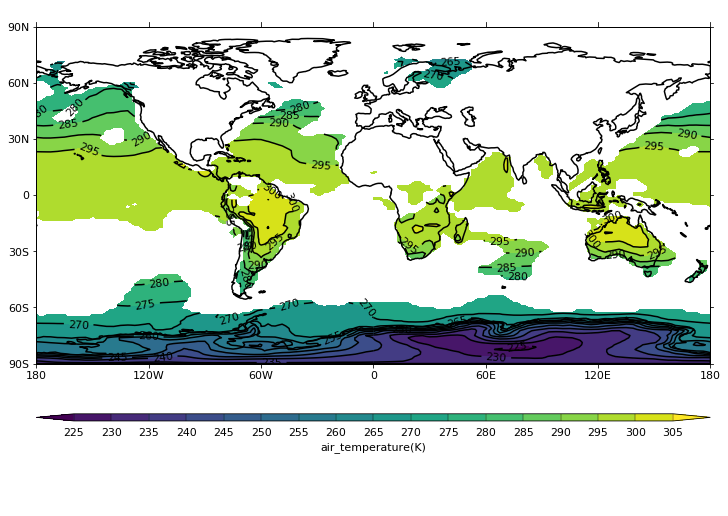

In [16]:
# Plot where the last timeslice is less than the temporal average
# (use cfp.con)
cfp.con(g.subspace[-1])